# Business problem:
* Build a predictive regression model


# Necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
import sklearn
print (dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

# Data Loading

In [3]:
df_adm = pd.read_csv('admission.csv')
df_adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,NaN,3.5,8.00,1,0.72
3,4,322,110,3,NaN,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df_adm.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
df_adm[100:110]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
100,101,322,107,3,3.5,3.5,8.46,1,0.71
101,102,312,105,2,2.5,3.0,8.12,0,0.64
102,103,314,106,2,4.0,3.5,8.25,0,0.62
103,104,317,104,2,4.5,4.0,8.47,0,0.57
104,105,326,112,3,3.5,3.0,9.05,1,0.74
105,106,316,110,3,4.0,4.5,8.78,1,0.69
106,107,329,111,4,4.5,4.5,9.18,1,0.87
107,108,338,117,4,3.5,4.5,9.46,1,0.91
108,109,331,116,5,5.0,5.0,9.38,1,0.93
109,110,304,103,5,5.0,4.0,8.64,0,0.68


In [6]:
df_adm.shape

(400, 9)

In [7]:
df_adm.index

RangeIndex(start=0, stop=400, step=1)

In [8]:
df_adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df_adm.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
df_adm.info()
# there are two missing values in SOP column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                398 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [11]:
# duplicate data

In [12]:
df_adm.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [13]:
df_adm[df_adm.duplicated()==True]
#There are no duplicate data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [14]:
# Missing values 

In [15]:
df_adm.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [16]:
df_adm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  2
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
# central tendency data
df_adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,398.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400754,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.009189,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [18]:
#Distributions

In [19]:
cols = df_adm.columns
cols

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

*********** Serial No. *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


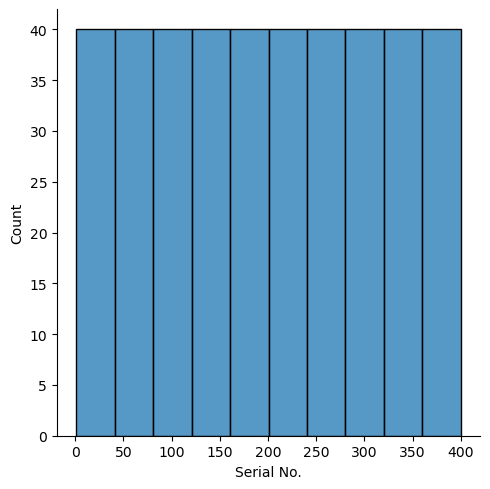

*******************
*********** GRE Score *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


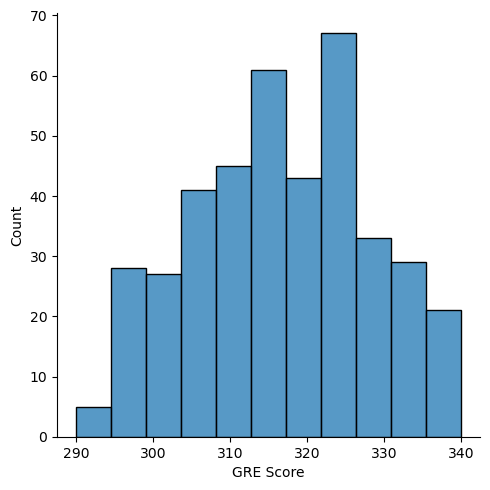

*******************
*********** TOEFL Score *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


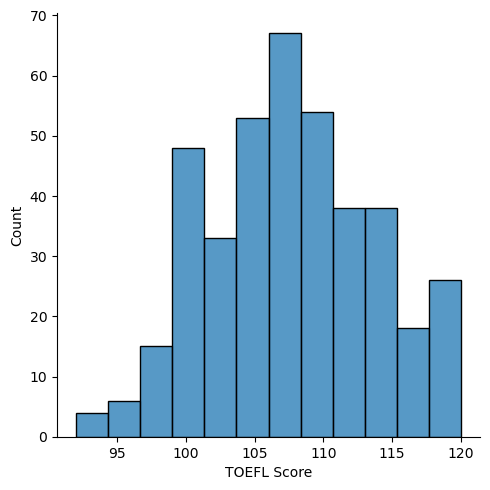

*******************
*********** University Rating *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


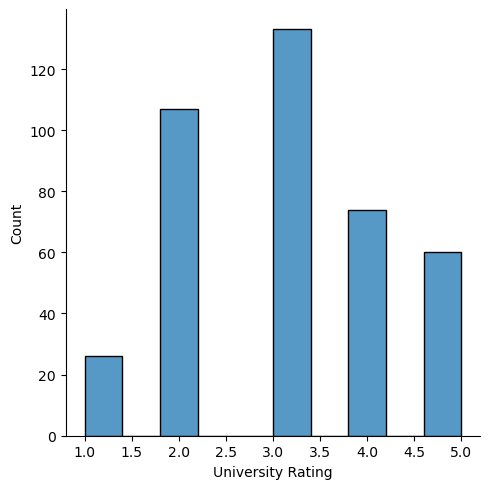

*******************
*********** SOP *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


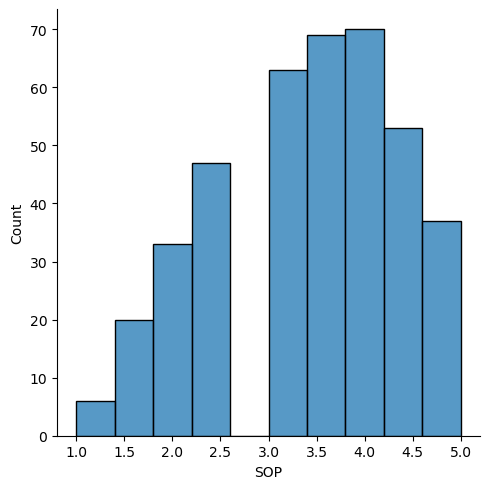

*******************
*********** LOR  *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


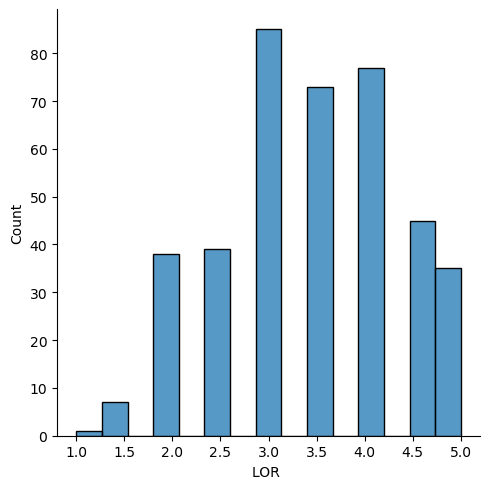

*******************
*********** CGPA *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


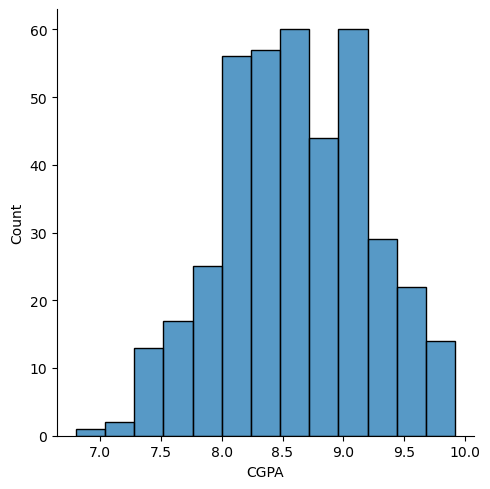

*******************
*********** Research *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


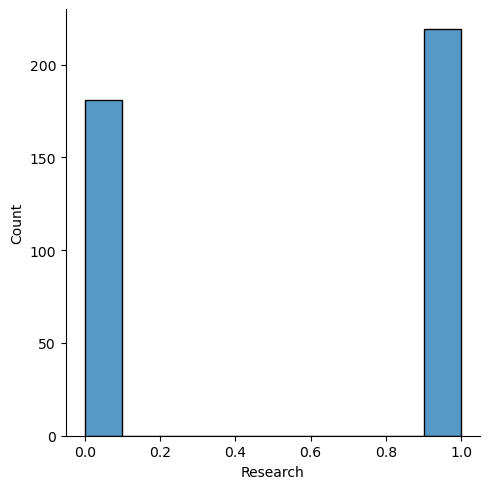

*******************
*********** Chance of Admit  *******************


C:\Users\harma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


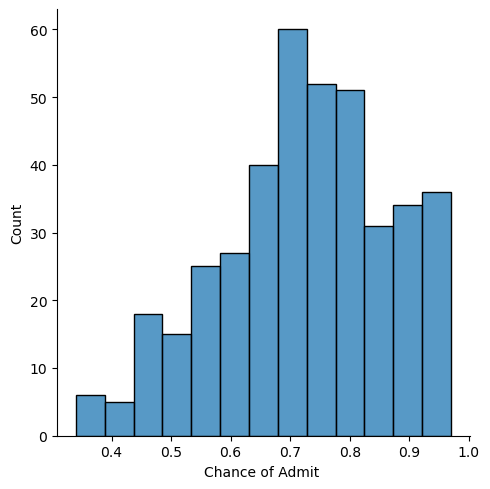

*******************


In [20]:
for i in cols:
    print ('***********', i, '*******************')
    sns.displot(df_adm[i])
    plt.show() #printing the plot
    print ('*******************')

In [21]:
df_adm['SOP'].mean(), df_adm['SOP'].median()

(3.400753768844221, 3.5)

In [22]:
#filling missing values
df_adm['SOP'].fillna(df_adm['SOP'].mean(), inplace=True)

In [23]:
df_adm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [24]:
#Qualitative analysis

In [25]:
for i in cols:
    print ('********', i, '***********')
    print ('variance:', df_adm[i].var())
    print ('std:', df_adm[i].std())
    print ('skew:', df_adm[i].skew())
    print ('kurtosis:', df_adm[i].kurtosis())

******** Serial No. ***********
variance: 13366.666666666666
std: 115.61430130683084
skew: 0.0
kurtosis: -1.2000000000000002
******** GRE Score ***********
variance: 131.6445551378446
std: 11.473646113500477
skew: -0.0628934593601882
kurtosis: -0.7004894569892768
******** TOEFL Score ***********
variance: 36.83899749373437
std: 6.069513777374129
skew: 0.05721591369844269
kurtosis: -0.5787784114188468
******** University Rating ***********
variance: 1.3081140350877225
std: 1.1437281298838997
skew: 0.17126027744362737
kurtosis: -0.7962869645118529
******** SOP ***********
variance: 1.013357829246483
std: 1.006656758406997
skew: -0.27803741381206776
kurtosis: -0.6728595870354357
******** LOR  ***********
variance: 0.8072619047619027
std: 0.898477548279256
skew: -0.10699147866617165
kurtosis: -0.6624841165896274
******** CGPA ***********
variance: 0.3555940795739347
std: 0.5963170964964317
skew: -0.06599054377889167
kurtosis: -0.4584756257280822
******** Research ***********
variance: 0.24

In [26]:
#Outliers:

******** Serial No. ***********


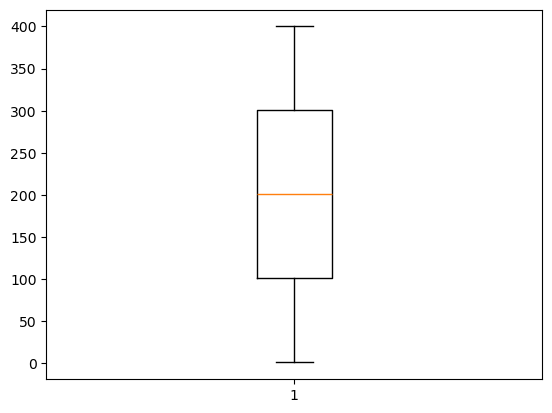

******** GRE Score ***********


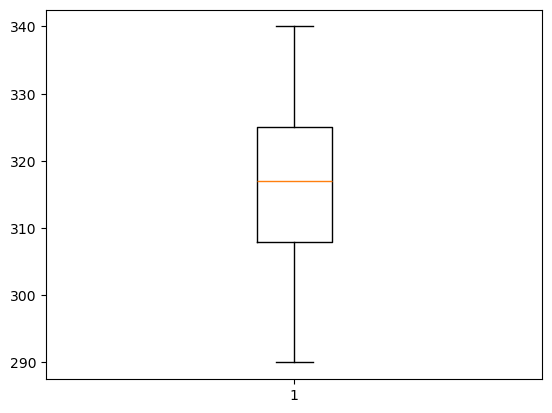

******** TOEFL Score ***********


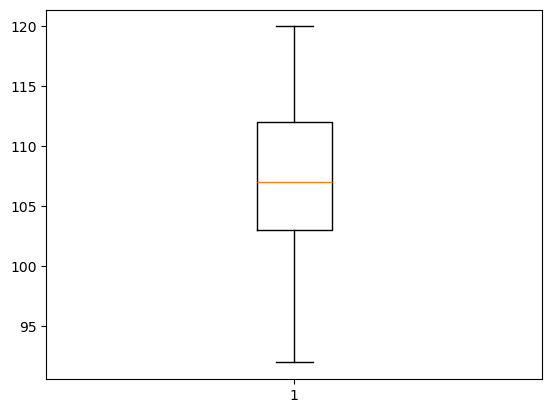

******** University Rating ***********


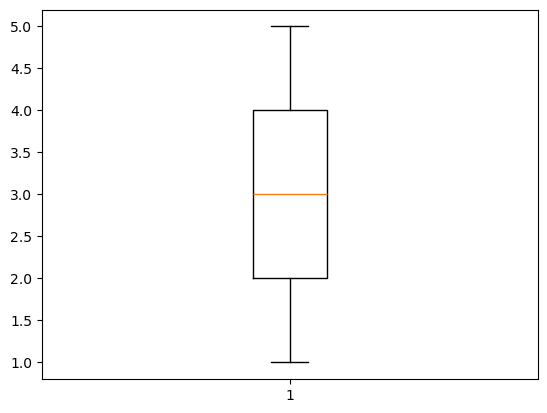

******** SOP ***********


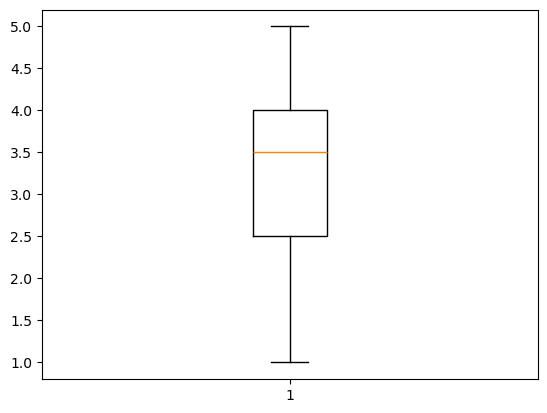

******** LOR  ***********


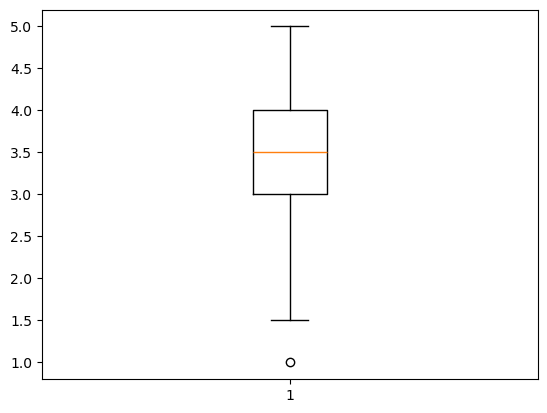

******** CGPA ***********


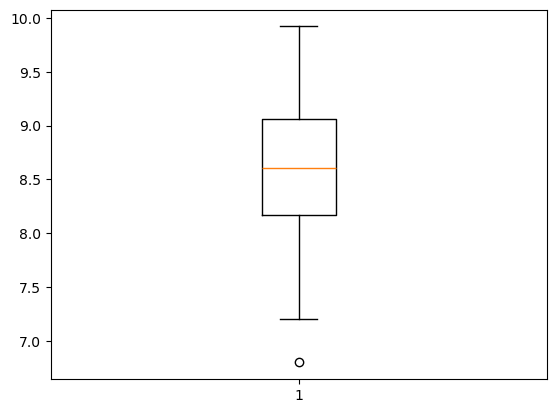

******** Research ***********


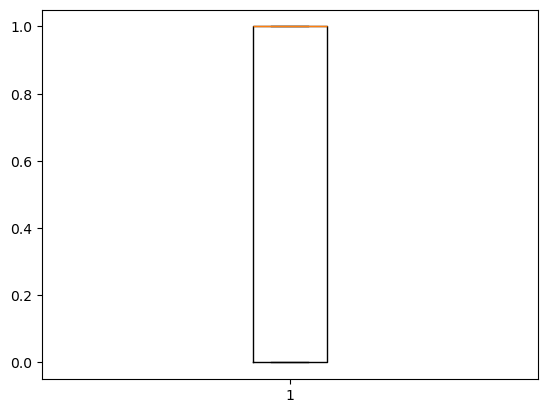

******** Chance of Admit  ***********


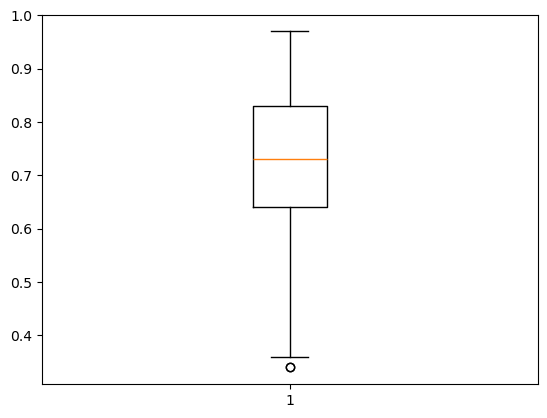

In [27]:
for i in cols:
    print ('********', i, '***********')
    plt.boxplot(df_adm[i])
    plt.show()

In [28]:
#IQR method
def outliers(input_col):
    import pandas as pd
    ol = []
    q1 = input_col.quantile(0.25)
    q3 = input_col.quantile(0.75)
    iqr = q3-q1
    left_whisker = q1-(1.5*iqr)
    right_whisker = q3+(1.5*iqr)
    for i in input_col:
        if (i>right_whisker) or (i<left_whisker):
            ol.append(i)
    if (len(ol)>=1):
        return ('there are outliers', left_whisker, right_whisker, len(ol), ol)
    else:
        return ('No outliers in my data')
    

In [29]:
outliers(df_adm['LOR '])

('there are outliers', 1.5, 5.5, 1, [1.0])

In [30]:
outliers(df_adm['CGPA'])

('there are outliers', 6.83125, 10.401250000000001, 1, [6.8])

In [31]:
#Imputing outliers through mask function

In [32]:
df_adm['LOR '] = df_adm['LOR '].mask(df_adm['LOR ']<1.5, df_adm['LOR '].median())

In [33]:
df_adm['CGPA'] = df_adm['CGPA'].mask(df_adm['CGPA']<6.83, df_adm['CGPA'].median())

In [34]:
outliers(df_adm['LOR '])

'No outliers in my data'

In [35]:
outliers(df_adm['CGPA'])

'No outliers in my data'

In [36]:
#Feature Selection / Correlation analysis

In [37]:
corr = df_adm.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.168252,-0.080077,-0.055558,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612778,0.551920,0.831478,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657453,0.557555,0.827391,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734620,0.653540,0.741116,0.447783,0.711250
SOP,-0.168252,0.612778,0.657453,0.734620,1.000000,0.720201,0.722543,0.444804,0.675713
LOR,-0.080077,0.551920,0.557555,0.653540,0.720201,1.000000,0.656794,0.392892,0.661223
CGPA,-0.055558,0.831478,0.827391,0.741116,0.722543,0.656794,1.000000,0.534710,0.863786
Research,-0.063138,0.580391,0.489858,0.447783,0.444804,0.392892,0.534710,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675713,0.661223,0.863786,0.553202,1.000000


In [38]:
df_adm.drop('Serial No.', axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation_Heatmap')

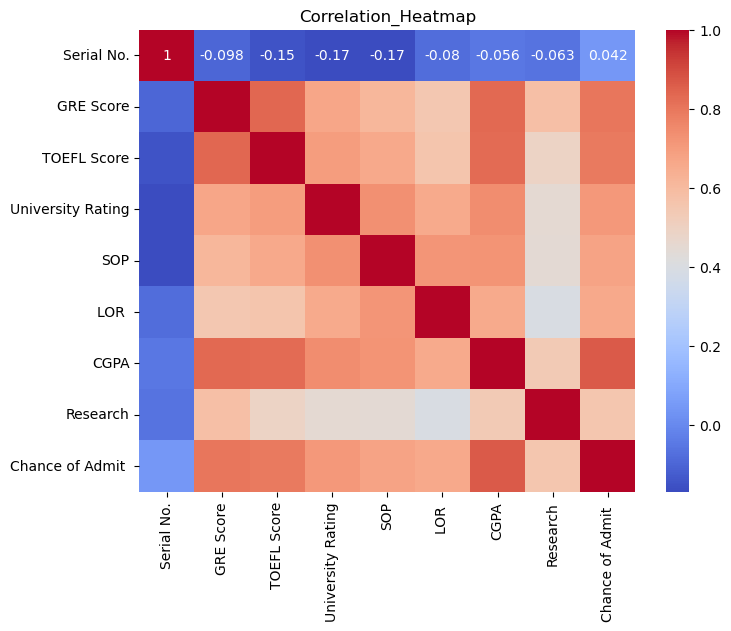

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation_Heatmap')

In [40]:
X = df_adm[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA']]

In [41]:
Y = df_adm['Chance of Admit ']

In [42]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.500000,4.5,9.65
1,324,107,4,4.000000,4.5,8.87
2,316,104,3,3.400754,3.5,8.00
3,322,110,3,3.400754,2.5,8.67
4,314,103,2,2.000000,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.500000,3.5,9.04
396,325,107,3,3.000000,3.5,9.11
397,330,116,4,5.000000,4.5,9.45
398,312,103,3,3.500000,4.0,8.78


In [43]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [62]:
#Train and test split data

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=45)

In [65]:
x_train.shape

(320, 6)

In [66]:
y_train.shape

(320,)

In [67]:
x_test.shape

(80, 6)

In [68]:
y_test.shape

(80,)

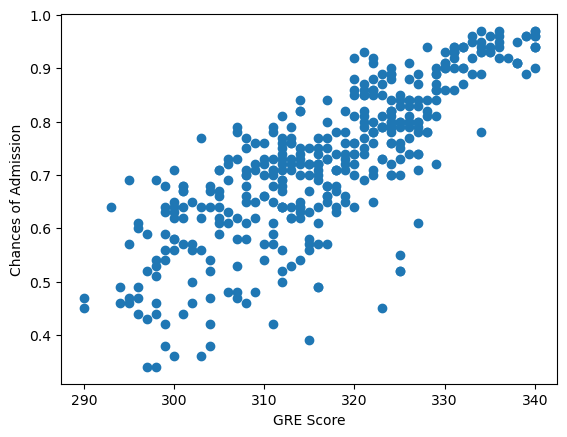

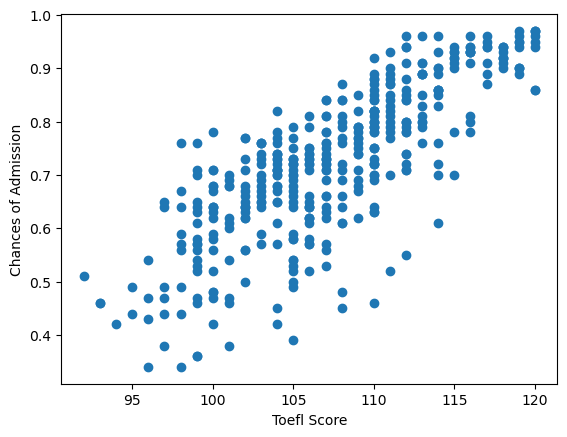

In [69]:
plt.scatter(df_adm['GRE Score'], df_adm['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chances of Admission')
plt.show()
plt.scatter(df_adm['TOEFL Score'], df_adm['Chance of Admit '])
plt.xlabel('Toefl Score')
plt.ylabel('Chances of Admission')
plt.show()


# Multi Linear Regression

In [77]:
#Step1: load algorithm
from sklearn.linear_model import LinearRegression 


In [78]:
#Step2: Create object 
mlr_model = LinearRegression(fit_intercept=True, n_jobs=None)

In [79]:
#step3 : Train the model
mlr_model.fit(x_train, y_train)

LinearRegression()

In [73]:
mlr_model.coef_ #beta coefficients of all inputs

array([ 0.00282714,  0.00246934,  0.0079881 , -0.00031477,  0.02114068,
        0.11170552])

In [74]:
mlr_model.intercept_

-1.495415099699343

In [80]:
Y = 0.00282714(GRE)+0.00246934(TOEFL)+..........+-1.495

SyntaxError: invalid syntax (3599749455.py, line 1)

In [81]:
#step4 : Test the model
pred = mlr_model.predict(x_test)
pred

array([0.70494593, 0.51477706, 0.74536603, 0.96894167, 0.70989617,
       0.80001828, 0.66433699, 0.73145498, 0.62403278, 0.83734351,
       0.62586853, 0.86888582, 0.67694131, 0.9816079 , 0.67441393,
       0.64251995, 0.49986244, 0.96816346, 0.76613999, 0.88588084,
       0.73390773, 0.66329623, 0.55247786, 0.65804334, 0.94882866,
       0.86869336, 0.54367538, 0.4957985 , 0.71837506, 0.64825251,
       0.84106617, 0.85013754, 0.97163636, 0.84281955, 0.77325533,
       0.59864698, 0.73090717, 0.77997871, 0.64098159, 0.46300854,
       0.63850819, 0.70669389, 0.78009575, 0.58688511, 0.72305269,
       0.79660392, 0.71570079, 0.7079444 , 0.8541822 , 0.76174961,
       0.66222525, 0.70648235, 0.51003283, 0.73028301, 0.6609385 ,
       0.72851302, 0.71055958, 0.58872187, 0.68698951, 0.82940987,
       0.62334999, 0.67749163, 0.58614216, 0.73078384, 0.79599956,
       0.54150749, 0.94293444, 0.80560356, 0.66932689, 0.80101278,
       0.82600103, 0.76105658, 0.72163926, 0.64398964, 0.61858

In [82]:
y_test

255    0.79
346    0.47
228    0.71
384    0.96
269    0.77
       ... 
320    0.75
73     0.84
79     0.46
390    0.64
204    0.69
Name: Chance of Admit , Length: 80, dtype: float64

In [83]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
255,307,110,4,4.0,4.5,8.37
346,304,97,2,1.5,2.0,7.64
228,318,112,3,4.0,3.5,8.67
384,340,113,4,5.0,5.0,9.74
269,308,108,4,4.5,5.0,8.34
...,...,...,...,...,...,...
320,317,106,3,4.0,3.5,8.50
73,314,108,4,4.5,4.0,9.04
79,294,93,1,1.5,2.0,7.36
390,314,102,2,2.0,2.5,8.24


In [84]:
df1 = pd.DataFrame({'real':y_test, 'predicted':pred})
df1['error'] = (df1['real']-df1['predicted'])**2
df1

,real,predicted,error
255,0.79,0.704946,0.007234
346,0.47,0.514777,0.002005
228,0.71,0.745366,0.001251
384,0.96,0.968942,0.000080
269,0.77,0.709896,0.003612
...,...,...,...
320,0.75,0.708733,0.001703
73,0.84,0.783912,0.003146
79,0.46,0.437363,0.000512
390,0.64,0.632831,0.000051


In [85]:
mse = df1['error'].mean()
mse

0.003451491646123407

In [86]:
rmse = math.sqrt(df1['error'].mean())
rmse

0.05874939698518962

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
mean_squared_error(y_test, pred)

0.003451491646123407

In [89]:
mean_absolute_percentage_error(y_test, pred)

0.06929876646658456

In [90]:
print ('model_accurecy:', r2_score(y_test, pred))

model_accurecy: 0.7973614568332532


In [95]:
# convert model in to pickle file
pickle.dump(mlr_model, open('admission_model.pkl', 'wb'))
print ('Model saved:', os.getcwd())

Model saved: C:\Users\harma\ML projects


In [96]:
#real -Time Applications

In [93]:
def real_predictions():
    gre = int(input('Gre score:'))
    toefl = int(input('toefl score:'))
    uni_rate = float(input('university rating:'))
    sop = float(input('sop score:'))
    lor = float(input('lor score:'))
    cgpa = float(input('cgpa score:'))
    array = np.array([gre,toefl,uni_rate,sop,lor,cgpa]).reshape(1,6)
    load_model = pickle.load(open('admission_model.pkl', 'rb'))
    result = load_model.predict(array)
    return ('chances of admission is:', round(result[0]*100, 2), '%')
    

In [94]:
real_predictions()

Gre score: 340
toefl score: 229
university rating: 54
sop score: 98
lor score: 90
cgpa score: 7


C:\Users\harma\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('chances of admission is:', 311.64, '%')

In [94]:
real_predictions()

Gre score:335
toefl score:118
university rating:4.9
sop score:4.8
lor score:4.5
cgpa score:9.5


C:\Users\Siri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('chances of admission is:', 93.7, '%')

In [95]:
real_predictions()

Gre score:280
toefl score:80
university rating:1.5
sop score:1.8
lor score:1.4
cgpa score:6


C:\Users\Siri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('chances of admission is:', 20.5, '%')

In [96]:
real_predictions()

Gre score:280
toefl score:80
university rating:1.5
sop score:1.8
lor score:1.4
cgpa score:9.9


C:\Users\Siri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('chances of admission is:', 64.06, '%')

In [97]:
real_predictions()

Gre score:340
toefl score:120
university rating:5
sop score:5
lor score:5
cgpa score:5.5


C:\Users\Siri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('chances of admission is:', 52.06, '%')